In [911]:
#Music recommender systems can suggest songs to users based on their listening patterns

In [912]:
import numpy as np
import pandas as pd

In [913]:
import matplotlib.pyplot as plt
import seaborn as sns

In [914]:
ntr = 7000
nts = 3000
train=pd.read_csv("train.csv",nrows=ntr)
names=['msno','song_id','source_system_tab','source_screen_name','source_type','target']
test1 = pd.read_csv("train.csv",names=names,skiprows=ntr,nrows=nts)
songs = pd.read_csv("songs.csv")
members = pd.read_csv("members.csv")

In [915]:
test1.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target'],
      dtype='object')

In [916]:
#Train dataset

In [917]:
train.sample(5)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
4776,UdEJzHHXQSMNS8tokwoO2RlB+bfSJUSBUkUdaQCrY84=,sUImxqw/31ix+HWgrkoOlz2Pz/TsO+ABQ1Cqo3qFFXY=,discover,Online playlist more,online-playlist,0
3886,vvCb86TfQkI3+VdkUhEbmKl82pjYPkSTsZU1cj9TLKY=,lV6azquq5tGk34xYGWuBdhjfGZz6YOAkd396ebTh82g=,discover,Online playlist more,online-playlist,0
5527,mLYm7+gmF00SBKhVXK6Zq9ymk1fRqBVO07+OAQBieS0=,VEHQ9uyNfwMBFPtkLOFGSOnovTSfj6RlQbgYZYp1xZQ=,discover,Discover Chart,online-playlist,1
114,O0AvcpH+4JaN06kYCsf1PBVVC6DvT5zfmNEw290htuM=,wWaQCZoXVhyptuqYAkWKTpuHhB02Sf3s3+zqr/w8jqQ=,my library,Local playlist more,local-library,1
5883,bk3aAKE/S4hBv4Hvd0fgTTdUZECzN6ku+7AYcYkhXjM=,Xf9cbG0BHDptXQbNtnFufyndHp4rrkW/3eRpSuF7j8E=,my library,Local playlist more,local-library,1


In [918]:
train.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target'],
      dtype='object')

In [919]:
train.shape

(7000, 6)

In [920]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   msno                7000 non-null   object
 1   song_id             7000 non-null   object
 2   source_system_tab   6986 non-null   object
 3   source_screen_name  6815 non-null   object
 4   source_type         6986 non-null   object
 5   target              7000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 328.2+ KB


In [921]:
#check for null
train.isnull().sum()

msno                    0
song_id                 0
source_system_tab      14
source_screen_name    185
source_type            14
target                  0
dtype: int64

In [922]:
#drop the null values
train=train[~train['source_screen_name'].isnull()]

In [923]:
train.shape

(6815, 6)

In [924]:
train.describe()

,target
count,6815.000000
mean,0.788114
std,0.408674
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [925]:
#Songs datasets

In [926]:
songs.sample(5)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
525806,ELxJ3P5noA9b+ra28LumECPZx51x7I9YRAlA35n3QYI=,348160,1572|275,Claudio Chianura,NaN,NaN,52.0
656238,glw1CMZcx0nhAv4hSNtiKIAlbqh5rZgQx0p1aJla+m8=,267400,1011,Nashville Cast,Traditional,NaN,52.0
714050,pGtR8q4qK28VubrJ/Ktrg7hKw86H7fe19kFXHXRcLXA=,214273,465,Workout Buddy,NaN,NaN,52.0
1917009,22592gErfoBR/jmNPhgiDpeNnbt5IKzUXdK05AxeCis=,230249,465,The O'Neill Brothers Group,NaN,NaN,52.0
734298,NF4ygqD8I/cdDeFHhupeS8kkZedWu/R7pvHCHaE7YpI=,202060,465,Anika Moa,NaN,NaN,52.0


In [927]:
songs.shape

(2296320, 7)

In [928]:
songs.columns

Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language'],
      dtype='object')

In [929]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [930]:
#check for null
songs.isnull().sum()

song_id              0
song_length          0
genre_ids        94116
artist_name          0
composer       1071354
lyricist       1945268
language             1
dtype: int64

In [931]:
songs.describe()

,song_length,language
count,2.296320e+06,2.296319e+06
mean,2.469935e+05,3.237800e+01
std,1.609200e+05,2.433241e+01
min,1.850000e+02,-1.000000e+00
25%,1.836000e+05,-1.000000e+00
50%,2.266270e+05,5.200000e+01
75%,2.772690e+05,5.200000e+01
max,1.217385e+07,5.900000e+01


In [932]:
# Members datasets

In [933]:
members.sample(5)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
1152,c/KvkHfXI9dsEBtV97ajn1/2pQtzgt5tIrJG+qWygVs=,1,0,NaN,4,20170115,20170118
1216,/PvdBFYVLAtEJOX65MEPYY64KUQ39x2JNqkpCVbkbsg=,1,0,NaN,3,20130405,20170712
28708,Hf05ps1aPI3U5r/gGhRT+nB9Db8wnFh69aNGcu4K0QY=,4,23,male,9,20110820,20170930
14880,KApYSh+sOA9hRe2GbaI5eR5DhDGk0MxJwzdn3qUzn7g=,1,0,NaN,4,20170212,20170927
26414,VKC6o8XocDzC5sIp42SHlpJDlagfgo0cK9szU4iSUSs=,15,25,male,3,20130301,20171103


In [934]:
members.shape

(34403, 7)

In [935]:

members.columns

Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')

In [936]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [937]:
members.isnull().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

In [938]:
members.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [939]:
#Data Visualization

In [940]:
import matplotlib as mpl

In [941]:
#data visulization on train dataset

Text(0, 0.5, 'count')

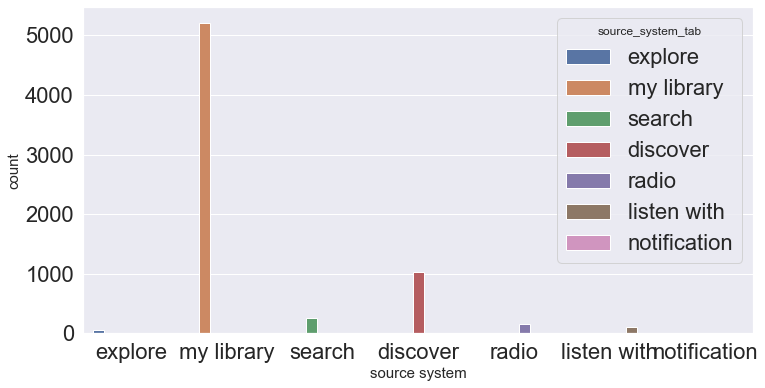

In [942]:
plt.figure(figsize=(12,6))
sns.countplot(x = train['source_system_tab'],hue=train['source_system_tab'])
plt.xlabel('source system',fontsize=15)
plt.ylabel('count',fontsize=15)

Text(0, 0.5, 'count')

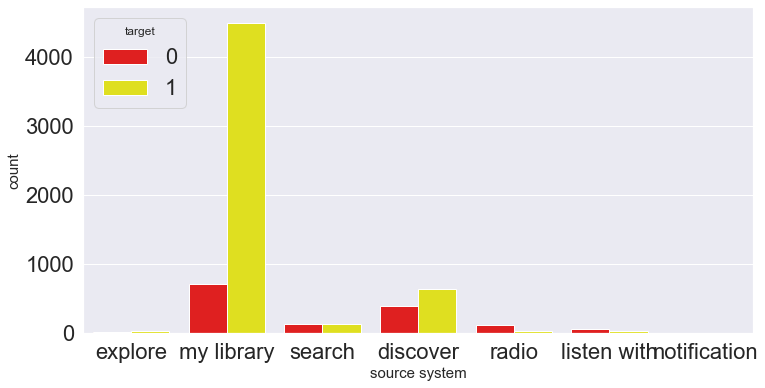

In [943]:
plt.figure(figsize=(12,6))
sns.countplot(x = train['source_system_tab'],palette=['red','yellow'],hue=train['target'])
plt.xlabel('source system',fontsize=15)
plt.ylabel('count',fontsize=15)

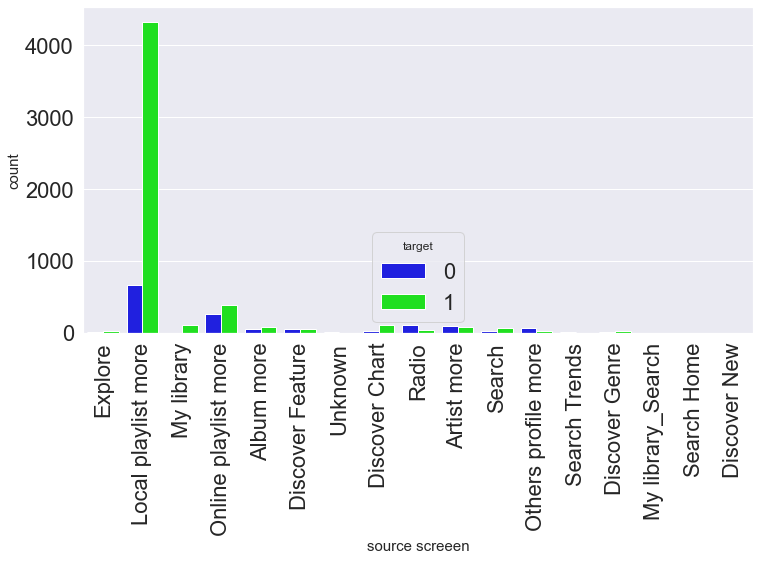

In [944]:
plt.figure(figsize=(12,6))
sns.countplot(x = train['source_screen_name'],palette=['blue','lime'],hue=train['target'],data = train,orient='v')
plt.xticks(rotation =90)
plt.xlabel('source screeen',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.show()

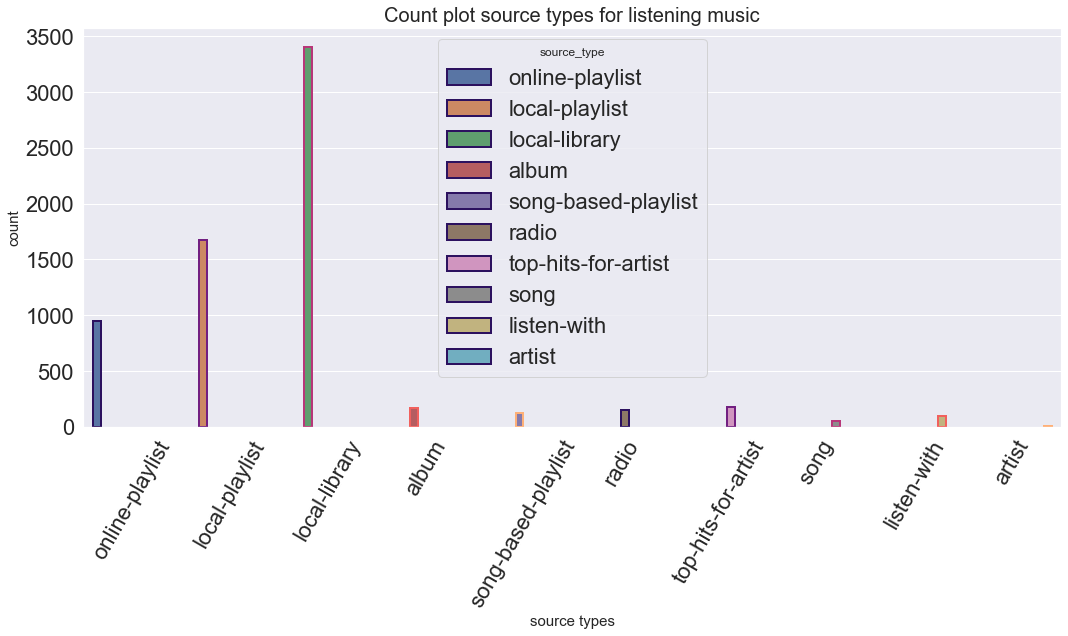

In [945]:
plt.figure(figsize=(15,9))
sns.set(font_scale=2)
sns.countplot(x='source_type',hue='source_type',data=train,linewidth=2,edgecolor=sns.color_palette('magma',5))
sns.set(style="ticks")
plt.xlabel('source types',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(rotation=60)
plt.title('Count plot source types for listening music',fontsize=20)
plt.tight_layout()

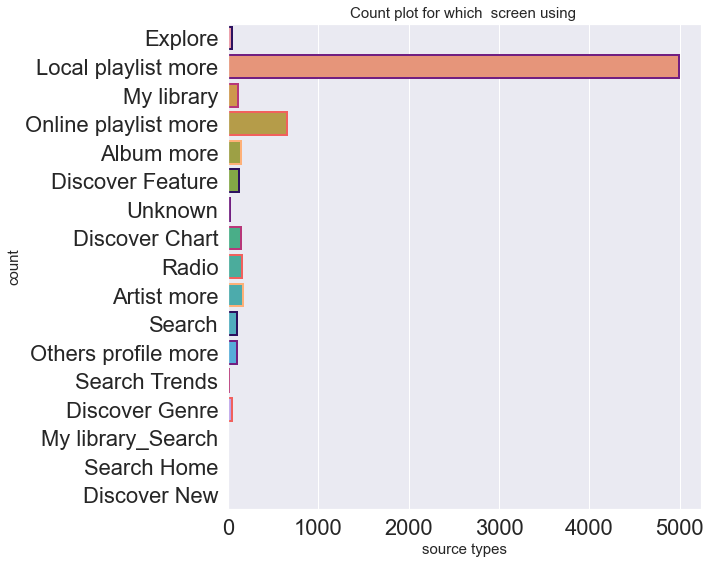

In [946]:
plt.figure(figsize=(10,8))
sns.set(font_scale=2)
sns.countplot(y='source_screen_name',data=train,linewidth=2,edgecolor=sns.color_palette('magma',5))
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(rotation=0)
plt.title('Count plot for which  screen using ',fontsize=15)
plt.tight_layout()

In [947]:
#data visulization on members dataset

In [948]:
def count_plot_function(data, x):
  plt.figure(figsize = (15,10))
  sns.set(font_scale = 2)
  sns.countplot(x = x, data = data)
  plt.xlabel(x, fontsize = 30)
  plt.ylabel('count', fontsize = 30)
  plt.xticks(rotation = 90)
  plt.title('Count plot', fontsize = 30)
  plt.tight_layout()

Text(0, 0.5, 'count')

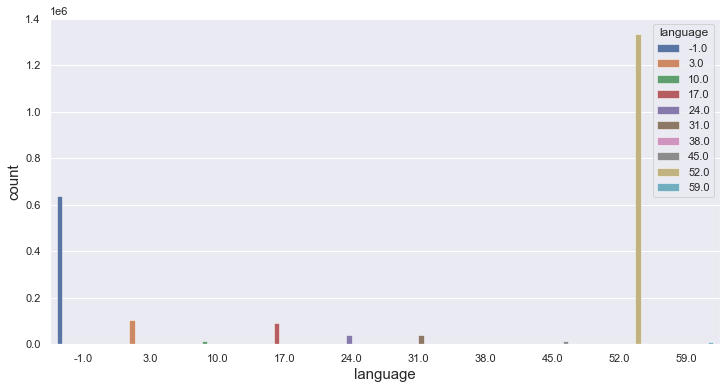

In [949]:
plt.figure(figsize=(12,6))
sns.countplot(x = songs['language'],data =train,linewidth=0.5,hue=songs['language'],orient='v')
plt.xlabel('language',fontsize=15)
plt.ylabel('count',fontsize=15)

In [950]:
#data visulization on members dataset

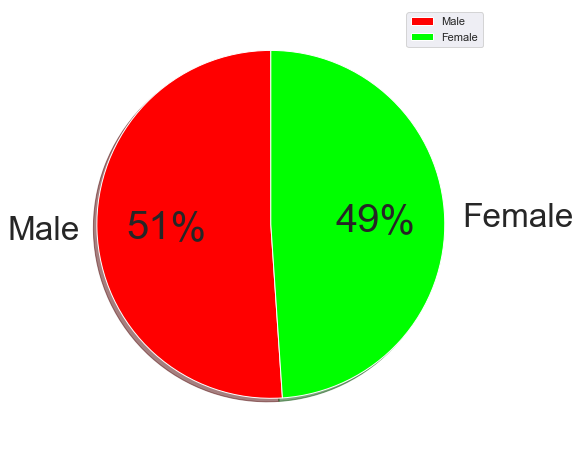

In [951]:
mpl.rcParams['font.size'] = 40.0
labels = ['Male','Female']
colors = ['red','lime']
plt.figure(figsize = (8, 8))
sizes = pd.value_counts(members.gender)
patches, texts, autotexts = plt.pie(sizes, 
                                    labels=labels,colors=colors, autopct='%.0f%%',
                                    shadow=True, radius=1,startangle=90)
for t in texts:
    t.set_size('smaller')
plt.legend()
plt.show()

Text(60.75, 0.5, 'count')

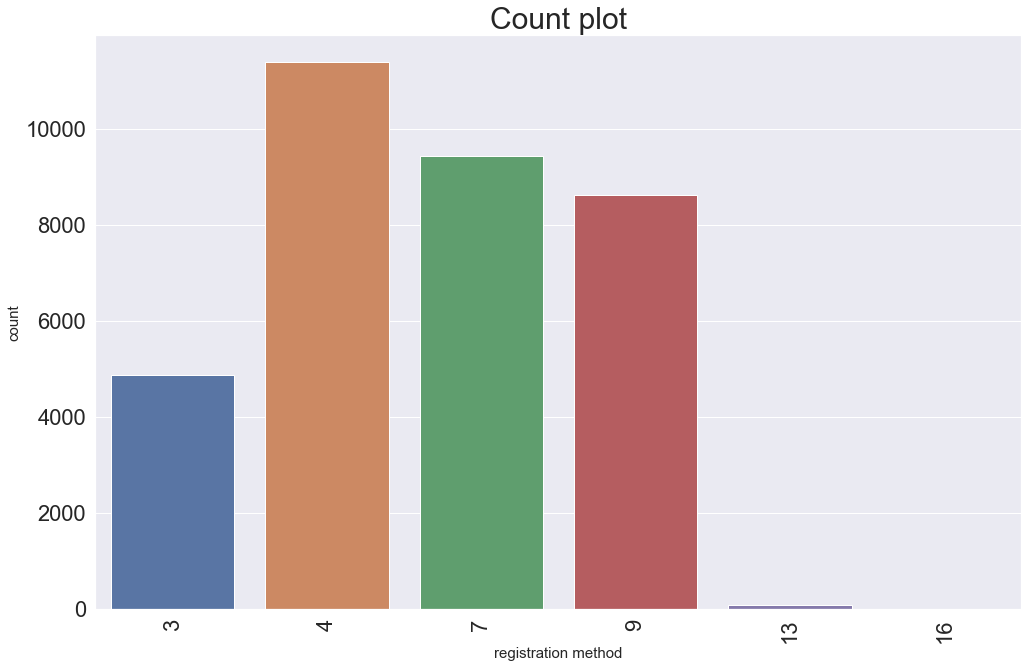

In [952]:
count_plot_function(members, 'registered_via')
plt.xlabel('registration method',fontsize=15)
plt.ylabel('count',fontsize=15)

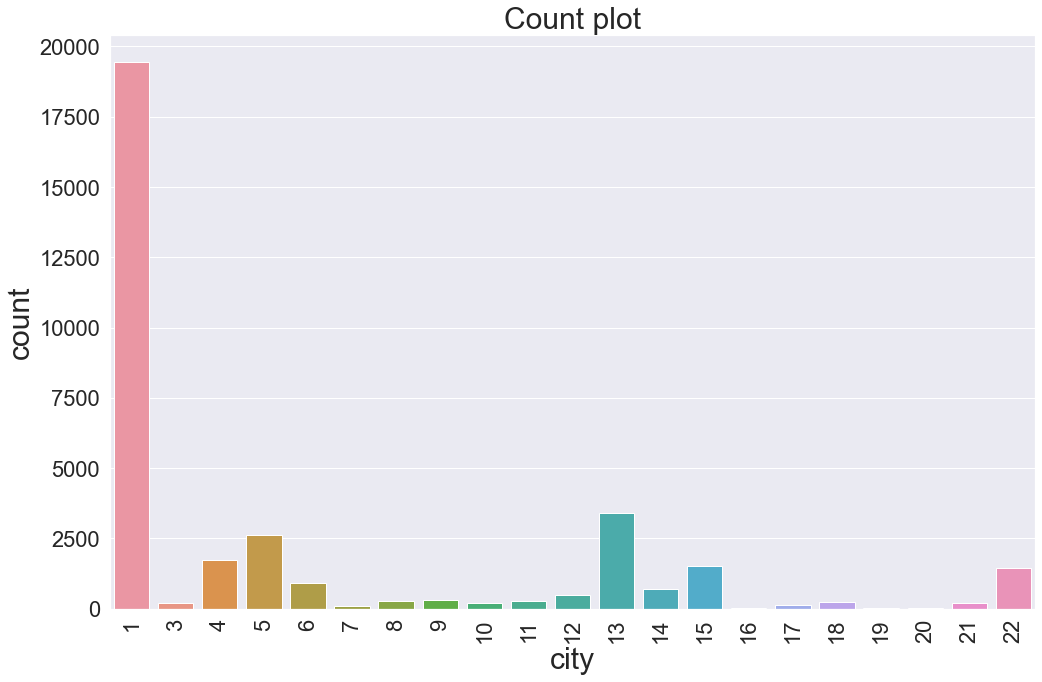

In [953]:
count_plot_function(members, 'city')

In [954]:
#doing stats test on members dataset

Text(0.5, 1.0, 'PDF for Registration')

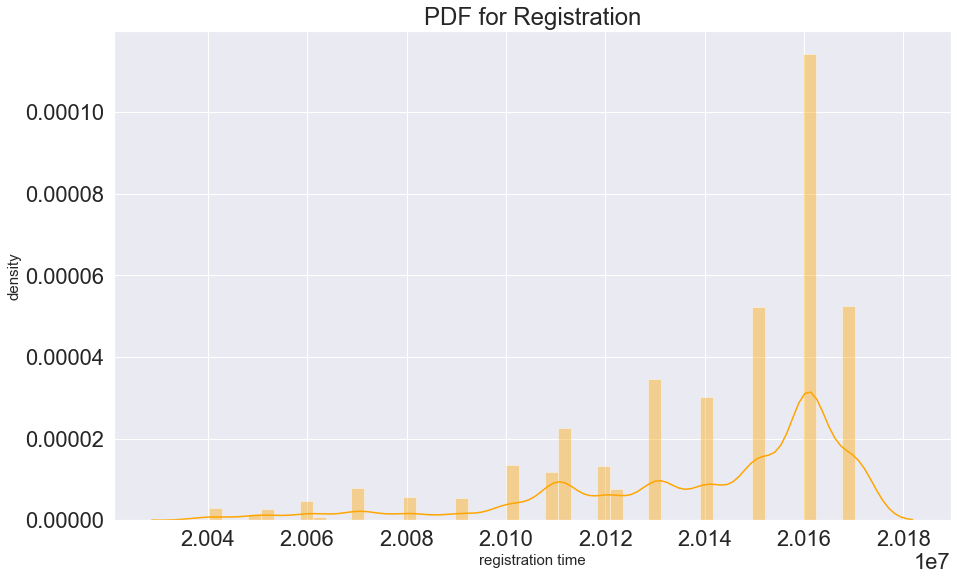

In [955]:
plt.figure(figsize = (15, 9)) 
sns.distplot(members.registration_init_time,color='orange')
sns.set(font_scale=2)
plt.ylabel('density',fontsize=15)
plt.xlabel('registration time' ,fontsize=15)
plt.title('PDF for Registration')

In [956]:
#Function to plot PDF and CDf.

def plot_pdf_cdf(x, flag):
  plt.figure(figsize = (10, 6)) 
  kwargs = {'cumulative': True}
  if flag:
    sns.distplot(x, hist_kws = kwargs, kde_kws = kwargs,color='purple')
    plt.title('CDF for age')
  else:
    sns.distplot(x,color='purple')
    plt.title('PDF for age')
  sns.set(font_scale=2)

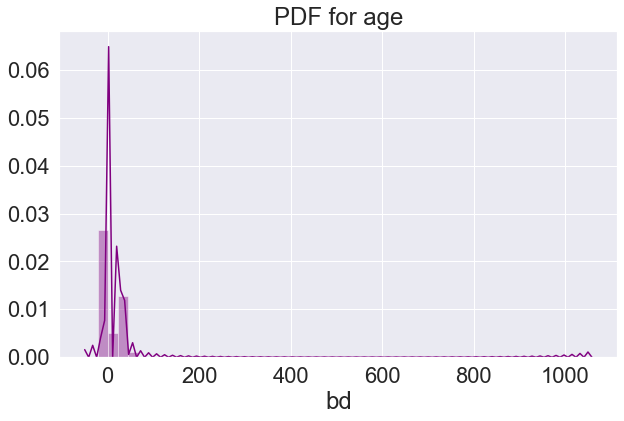

In [957]:
plot_pdf_cdf(members['bd'], False)

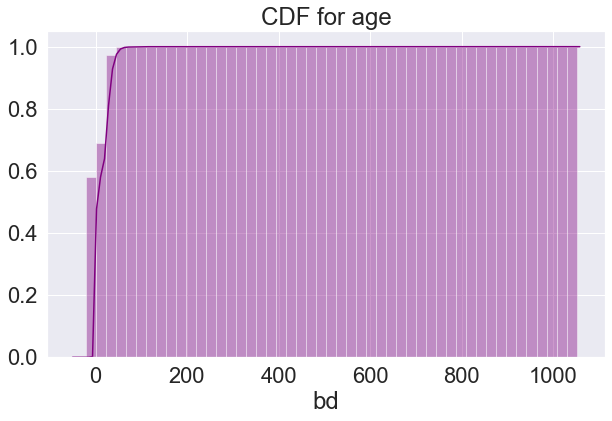

In [958]:
plot_pdf_cdf(members['bd'], True)

In [959]:
#We can also observe via above CDF that almost 99% values are below 50. There are also some outliers 
#like 1030, -38, -43, 1051, etc. 
#As age cannot be negative value or more than 1000 for humans

In [960]:
np.percentile(members['bd'].values, 98)

47.0

In [961]:
# 98th percentile user is of 47 age.
# Means most of the user are below 50.

In [962]:
#   DATA PREPROCESSING AND CLEANING

In [963]:
test = test1.drop(['target'],axis=1)
ytr = np.array(test1['target'])

In [964]:
#left join song dataset to train & test
song_cols = ['song_id', 'artist_name', 'genre_ids', 'song_length', 'language']
train = train.merge(songs[song_cols], on='song_id', how='left')
test = test.merge(songs[song_cols], on='song_id', how='left')

In [965]:
#extracting date month & year using lambda function
members['registration_year'] = members['registration_init_time'].apply(lambda x: int(str(x)[0:4]))
members['registration_month'] = members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
members['registration_date'] = members['registration_init_time'].apply(lambda x: int(str(x)[6:8]))

In [966]:
#extracting date month & year using lambda function
members['expiration_year'] = members['expiration_date'].apply(lambda x: int(str(x)[0:4]))
members['expiration_month'] = members['expiration_date'].apply(lambda x: int(str(x)[4:6]))
members['expiration_date'] = members['expiration_date'].apply(lambda x: int(str(x)[6:8]))
members = members.drop(['registration_init_time'], axis=1)

In [967]:
#left join members dataset to train & test
members_cols = members.columns
train = train.merge(members[members_cols], on='msno', how='left')
test = test.merge(members[members_cols], on='msno', how='left')

In [968]:
#filling the nulls
train = train.fillna(-1)
test = test.fillna(-1)

In [969]:
import gc

In [970]:
del members, songs; gc.collect(); #cillecting the garbage

In [971]:
colm = list(train.columns)
colm.remove('target')

In [972]:
from tqdm import tqdm

from sklearn.preprocessing import LabelEncoder
for col in tqdm(colm):
    if train[col].dtype == 'object':
        train[col] = train[col].apply(str)
        test[col] = test[col].apply(str)

        le = LabelEncoder()
        train_vals = list(train[col].unique())
        test_vals = list(test[col].unique())
        le.fit(train_vals + test_vals)
        train[col] = le.transform(train[col])
        test[col] = le.transform(test[col])

100%|█████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 302.39it/s]


In [973]:
train.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'artist_name', 'genre_ids', 'song_length',
       'language', 'city', 'bd', 'gender', 'registered_via', 'expiration_date',
       'registration_year', 'registration_month', 'registration_date',
       'expiration_year', 'expiration_month'],
      dtype='object')

In [974]:
test.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'artist_name', 'genre_ids', 'song_length', 'language',
       'city', 'bd', 'gender', 'registered_via', 'expiration_date',
       'registration_year', 'registration_month', 'registration_date',
       'expiration_year', 'expiration_month'],
      dtype='object')

In [975]:
#storing unique songs & popularity
unique_songs = range(max(train['song_id'].max(), test['song_id'].max()))
song_popularity = pd.DataFrame({'song_id': unique_songs, 'popularity':0})

#sorting train & test data on song id & reset the index
train_sorted = train.sort_values('song_id')
train_sorted.reset_index(drop=True, inplace=True)
test_sorted = test.sort_values('song_id')
test_sorted.reset_index(drop=True, inplace=True)

In [976]:
#MODEL BUILDING
from sklearn.model_selection import train_test_split
import lightgbm as lgb
X = np.array(train.drop(['target'], axis=1))
y = train['target'].values

X_test = np.array(test.drop(['song_id'], axis=1))
ids = test['song_id'].values

del train, test; gc.collect();

X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.1, random_state = 12)
    
del X, y; gc.collect();

d_train = lgb.Dataset(X_train, label=y_train)
d_valid = lgb.Dataset(X_valid, label=y_valid) 

watchlist = [d_train, d_valid]

In [977]:
X_valid.shape

(682, 19)

In [978]:
#     Model Traning on classification models

In [979]:
from sklearn.metrics import r2_score

In [980]:
# Logistic Regression

print('In Logistic regression')
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(X_train,y_train)
print('Training Score : {}'.format(model.score(X_train,y_train)))
y_pred_lr=model.predict(X_valid)
acc = (1+r2_score(y_valid,y_pred_lr))*100
print("Accuracy on test data for the model", acc)

In Logistic regression
Training Score : 0.7877058535789988
Accuracy on test data for the model 73.70370370370367


In [981]:
# Random Forest Classifier

print('In RandomForestClassifier')
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
model=rfc.fit(X_train,y_train)
print('Training Score : {}'.format(model.score(X_train,y_train)))
y_pred_lr=model.predict(X_valid)
acc = (1-r2_score(y_valid,y_pred_lr))*100
print("Accuracy on test data for the model", acc)

In RandomForestClassifier
Training Score : 1.0
Accuracy on test data for the model 83.60459050599897


In [982]:
#first applying logistic regression
#PREDICTION USING LIGHTGBM
params = {}
params['learning_rate'] = 0.4
params['application'] = 'binary'
params['max_depth'] = 15
params['num_leaves'] = 2**8
params['verbosity'] = 0
params['metric'] = 'auc'

model1 = lgb.train(params, train_set=d_train, num_boost_round=200, valid_sets=watchlist, \
early_stopping_rounds=10, verbose_eval=10)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

C:\Users\tridi\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\tridi\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


In [983]:
p_test = model1.predict(X_test,predict_disable_shape_check=True)

In [984]:
yhat = (p_test>0.5).astype(int)
comp = (yhat==ytr).astype(int)
acc = comp.sum()/comp.size*100
print('The accuracy of lgbm model on test data is: {0:f}%'.format(acc))

The accuracy of lgbm model on test data is: 71.866667%


In [985]:
#So the Random Forest Classifier is the best for this with accuracy of 83.6%

In [ ]:
#Thnak You